## Code For Gradient Descent method



First function:
    $$ f(x,y) = \frac{x^2}{8} + \frac{3y^2}{11} - \frac{xy}{7} $$
    

### How it works

The gradient descent minimizes a function $f(x)$ (where x may represent more than one variable) by taking a series of steps down the negative gradient at each point in the step. In our examples, we will be minimizing functions of two variables $f(x,y)$. The algorithm for this method is as follows:

- 1 Initialize a starting point $(x_o, y_o)$

Our starting point will be random, and thus we define an initialization function that uses numpy's random number generator to generate an initial $(x_o, y_o)$ point along the paraboloid.

- 2 Find the negative gradient at the point.

We define a gradient function which will return the derivatives of the function (with respect to x and y). The gradient will tell us the direction in which we want to search for points as we minimize the function.

- 3 Initialize the step size $\gamma$

Our first step along the gradient descent calculated from step 2 is chosen to be small (0.01, for example). 

- 4 Calculate the point that minimizes the function in the gradient descent direction

This is done by the following relation: $$x_n+1 = x_n - \gamma * \nabla f(x)$$ - note that in this case, x is a vector containing the x and y coordinates.

- 5 Include variable step size

In order to decrease the number of steps taken to convergence, $\gamma$ becomes a variable step size for each successive iteration of the algorithm. The variable step size is calculated via line search according to the following relation:

$$ \gamma_n = \frac{(x_n-x_{n-1})^T [\nabla f(x_n) - \nabla f(x_{n-1})]} {||\nabla f(x_n) - \nabla f(x_{n-1})||^2} $$

Where again, x represents the vector containing the x and y coordinates calculated from the previous iteration. The above criterion for the size of the step is known as the Barzilai-Borwein method.

- 6 Repeat algorithm until convergence criterion is met

We repeat the algorithm until our convergence criterion is met - until our minimization gives a value within 0.001 to the true minimum, for example.



Below, we do a couple of examples to illustrate the functionality of the gradient descent algorithm. First, we plot the function in 3D, and then implement the algorithm to show its convergence to the function's minimum on a contour map of the function.

<IPython.core.display.Javascript object>


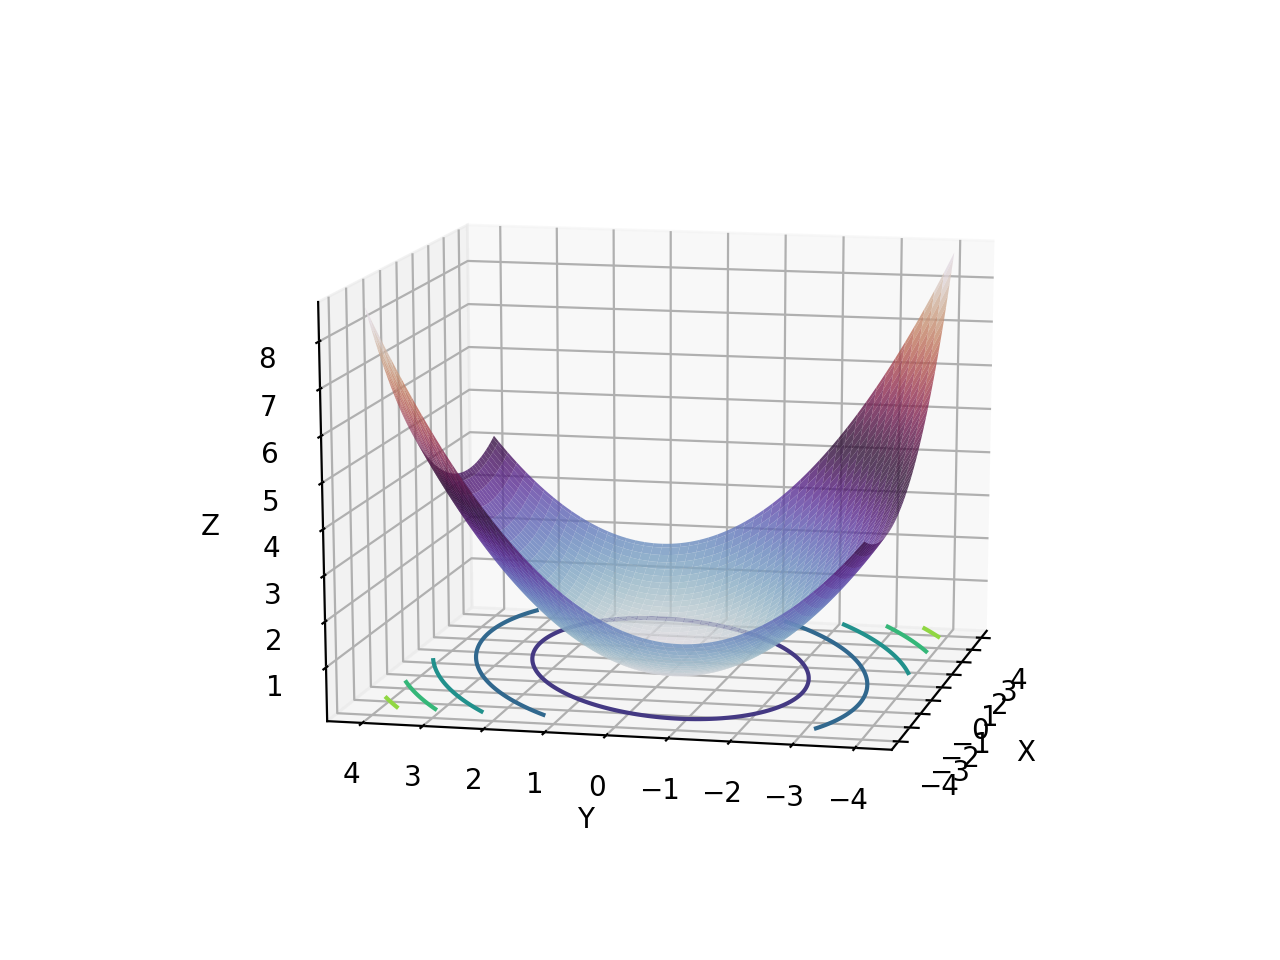

In [49]:
%matplotlib notebook 

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#range of x and y
x_min, x_max = -4, 4                          
y_min, y_max = -4, 4                          

#Define the function
def f(x):
    return x[0]**2/8 + 3*x[1]**2/11 -x[0]*x[1]/7

def f2(x):
    return x[0]**2/2 + x[1]**2/3 - x[0]*x[1]/4 + 3* np.exp(-x[0]**2)

nx = np.linspace(x_min,x_max,100)
ny = np.linspace(y_min,y_max,100)

x,y = np.meshgrid(nx,ny)

z = f([x,y])
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(x,y,z, cmap='twilight', alpha=0.8)
cset = ax.contour(x,y,z, zdir='z', offset=0)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

In [44]:
#Define an initialization function to assign random starting position to point.
def init(x_min, x_max, y_min, y_max):
    x0 = x_min+np.random.random()*(x_max-x_min)
    y0 = y_min+np.random.random()*(y_max-y_min)
    return [x0, y0]

nx = np.linspace(x_min,x_max,400)
ny = np.linspace(y_min,y_max,400)


In [50]:
def derivative(f, x0, gamma=0.001):
    x, y = x0[0], x0[1]
    fx = (f([(x+gamma), y]) -f([x, y]))/gamma
    fy = (f([x, (y+gamma)])-f([x, y]))/gamma
    der = np.array([fx, fy])
    return der

#For the first iteration, I use a small, pre-defined step size "gamma" since there is not yet a previous position.
#After the first iteration is complete, the variable step-size calculation kicks in to find the variable step size according
#to the gradient calculated from the current position "x_now" and the previous position "x_prev".
#Then, I calculate "x_next" using the calculated gamma step-size.
def minimum(f, x0, N=1000):
    
    x_now = x0
    x_prev = None
    converged = False
    x_hist = []
    x_hist.append(x_now)
    
    for i in range(N):
        
        df_now = derivative(f, x_now)
        
        if x_prev is None:
            gamma = 0.001
        else:
            df_prev = derivative(f, x_prev)
            gamma = np.dot(x_now-x_prev, df_now-df_prev) / np.linalg.norm(df_now-df_prev)**2
        x_next = x_now - gamma*df_now
        
        if abs(f(x_next)-f(x_now)) < 1e-4:
            converged = True
            break
        else:
            x_prev = x_now
            x_now = x_next
            x_hist.append(x_now)
            
    return converged, np.array(x_hist), f(x_now)

<IPython.core.display.Javascript object>


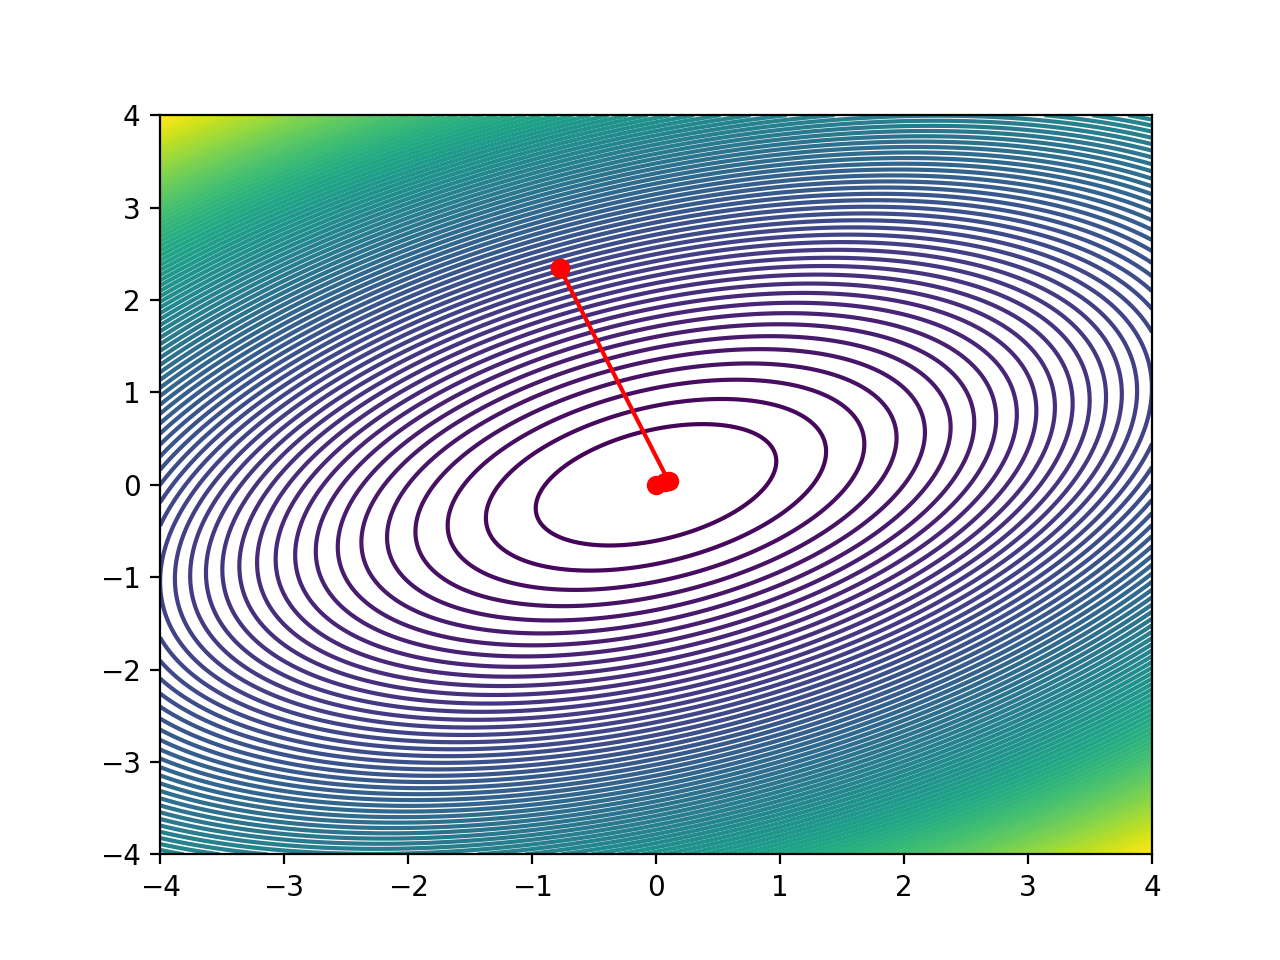

Converged =  True
Minimum: f(x,y) =   1.5414118112339764e-07
Number of iterations:   5
XY Coordinates of starting position:  [-0.77706298  2.34962323]
Z value of starting position:  1.8419611211160045
XY Coordinates of minimum:  [-0.00090338 -0.00073371]
Z value of minimum:  1.5414118112339764e-07
True Z value of minimum:  0.0


In [56]:
x_min, x_max, y_min, y_max = -4, 4, -4, 4
x0 = init(x_min, x_max, y_min, y_max)
converged, x_hist, f_min = minimum(f, x0)
nx = np.linspace(x_min, x_max, 400)
ny = np.linspace(y_min, y_max, 400)
x, y = np.meshgrid(nx, ny)
z = f([x,y])
fig = plt.figure()
levels = np.arange(np.min(z), np.max(z), 0.1)
plt.contour(x,y,z, levels=levels)

plt.plot(x_hist[:,0], x_hist[:,1], 'ro-')
#plt.scatter(x_hist[-1,0], x_hist[-1,1], 'b')
plt.show()
print('Converged = ', converged)
print('Minimum: f(x,y) =  ', f_min,)
print('Number of iterations:  ', len(x_hist))
print('XY Coordinates of starting position: ', x_hist[0])
print('Z value of starting position: ', f(x_hist[0]))
print('XY Coordinates of minimum: ', x_hist[-1])
print('Z value of minimum: ', f(x_hist[-1]))
print('True Z value of minimum: ', f([0,0]))

### What about when there are two minimums in close proximity?

Gradient descent is good at minimizing a function with only one minimum, as we have seen. Furthermore, the function should ideally have a quadratic behavior around the minimum; higher-order functions where at least one variable is cubic or higher are more difficult to minimize using gradient descent. Furthermore, gradient descent typically fails when trying to find the minimum of a function with several minimums in close proximity (as we saw in lecture). Below we show an example of this.

<IPython.core.display.Javascript object>


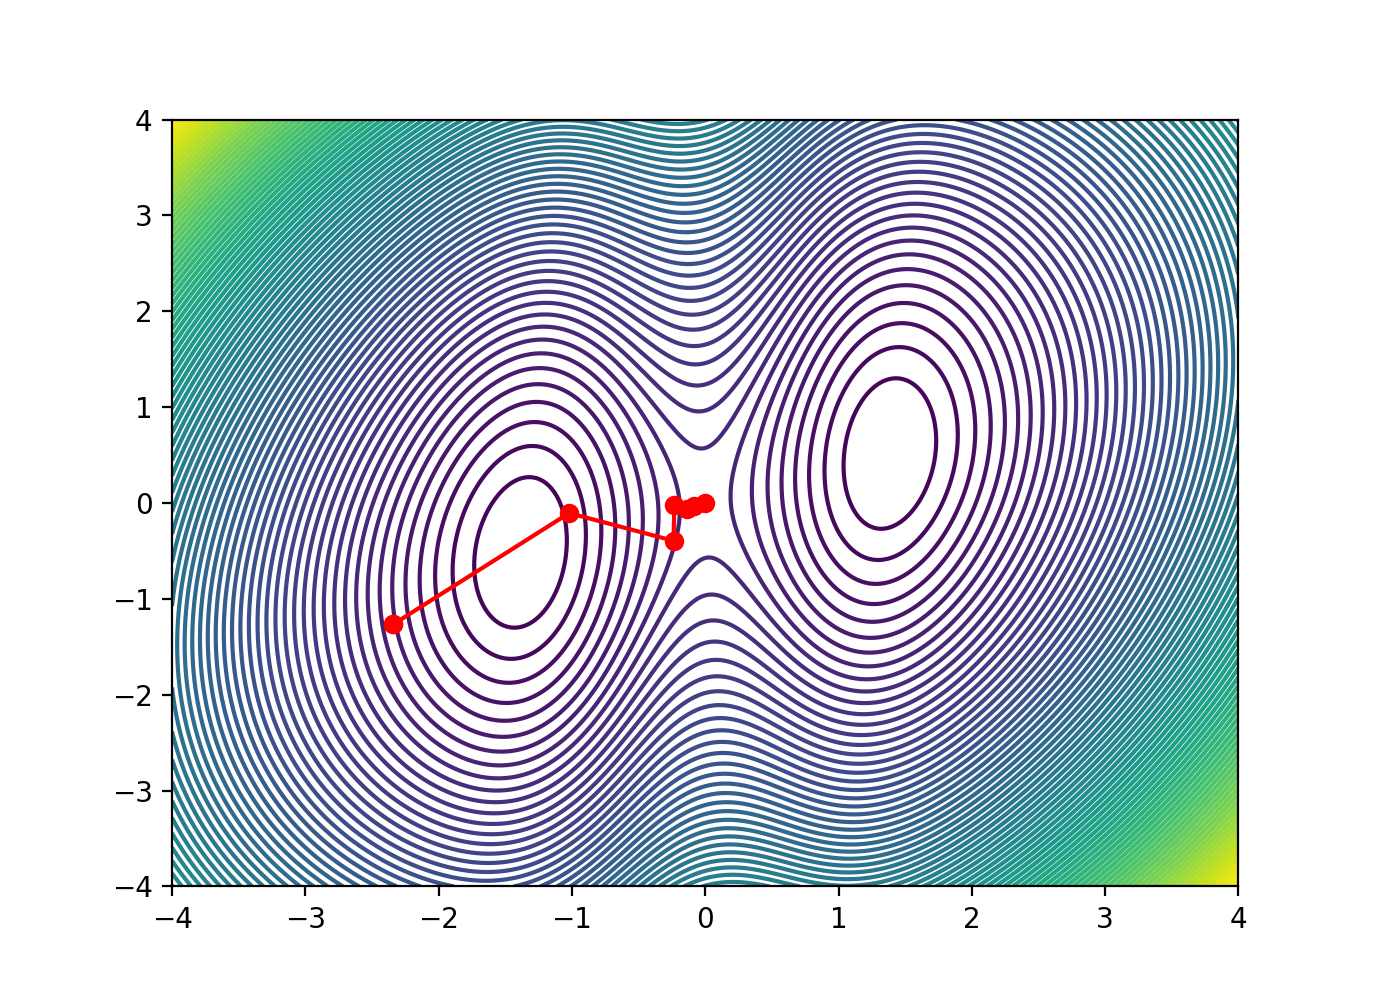

Converged =  True
Minimum: f(x,y) =   1.4334988880329328e-06
Number of iterations:   8
XY Coordinates of starting position:  [-2.33924263 -1.26452053]
Z value of starting position:  0.6975269061737595
XY Coordinates of minimum:  [-0.00195571 -0.0024527 ]
Z value of minimum:  1.4334988880329328e-06
True Z value of minimum:  0.0


In [53]:
x_min, x_max, y_min, y_max = -4, 4, -4, 4
x0 = init(x_min, x_max, y_min, y_max)
converged, x_hist, f_min = minimum(f, x0)
nx = np.linspace(x_min, x_max, 400)
ny = np.linspace(y_min, y_max, 400)
x, y = np.meshgrid(nx, ny)
z = f2([x,y])
fig = plt.figure()
levels = np.arange(np.min(z), np.max(z), 0.2)
plt.contour(x,y,z, levels=levels)

plt.plot(x_hist[:,0], x_hist[:,1], 'ro-')
#plt.scatter(x_hist[-1,0], x_hist[-1,1], 'b')
plt.show()
print('Converged = ', converged)
print('Minimum: f(x,y) =  ', f_min,)
print('Number of iterations:  ', len(x_hist))
print('XY Coordinates of starting position: ', x_hist[0])
print('Z value of starting position: ', f(x_hist[0]))
print('XY Coordinates of minimum: ', x_hist[-1])
print('Z value of minimum: ', f(x_hist[-1]))
print('True Z value of minimum: ', f([0,0]))